# 기본 셋팅

In [1]:
import requests
import pandas as pd
import time

In [14]:
API_KEY = 'live_45b6a5ad1e57af21decde3574acf9776e0bd7fb3bc210a21a872ef643e023d4cefe8d04e6d233bd35cf2fabdeb93fb0d'
HEADERS = {
    'accept': 'application/json',
    'x-nxopen-api-key' : API_KEY
}

# API 호출 테스트

In [18]:
# test 호출
RANKING_API_URL = 'https://open.api.nexon.com/maplestory/v1/ranking/overall'
params = {
    'date' : '2025-04-27',
    'class' : '카데나-전체 전직'
}
response = requests.get(RANKING_API_URL, headers=HEADERS, params=params)
if response.status_code == 200:
    print (response.json())
else :
    print('에러임')

{'ranking': [{'date': '2025-04-27', 'world_name': '제니스', 'ranking': 1, 'character_name': '보마노랑이', 'character_level': 299, 'character_exp': 1317273690520745, 'class_name': '궁수', 'sub_class_name': '보우마스터', 'character_popularity': 56214, 'character_guildname': '달치즈'}, {'date': '2025-04-27', 'world_name': '유니온', 'ranking': 2, 'character_name': 'Marksbowman', 'character_level': 296, 'character_exp': 328775440792820, 'class_name': '궁수', 'sub_class_name': '보우마스터', 'character_popularity': 4539, 'character_guildname': '늙은밤'}, {'date': '2025-04-27', 'world_name': '이노시스', 'ranking': 3, 'character_name': '폭등', 'character_level': 295, 'character_exp': 303229110980347, 'class_name': '궁수', 'sub_class_name': '보우마스터', 'character_popularity': 1351, 'character_guildname': '악동'}, {'date': '2025-04-27', 'world_name': '크로아', 'ranking': 4, 'character_name': '뽀마', 'character_level': 295, 'character_exp': 41717121807382, 'class_name': '궁수', 'sub_class_name': '보우마스터', 'character_popularity': 151, 'character_gui

# 데이터 추출 과정

## 직업별 100명 목표 (수정 전)

In [27]:
# 랭킹 API 기본 URL
RANKING_API_URL = 'https://open.api.nexon.com/maplestory/v1/ranking/overall'

# 타겟 직업 세팅
target_class = ['궁수-보우마스터', '카데나-전체전직']

# 최종 수집 데이터
character_list = []

# 랭킹 API 호출 함수 (직업 필터 추가)
def get_ranking(class_param, page_num):
    params = {
        'date' : '2025-04-27',
        'class': class_param,
        'page': page_num,
    }
    response = requests.get(RANKING_API_URL, headers=HEADERS, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

# 각 직업별로 랭킹 수집
for class_param in target_class:
    page = 5
    collected = 0
    while collected < 100:  # 직업별 100명 목표
        data = get_ranking(class_param, page)
        if not data or not data.get('ranking'):
            break
        
        for character in data['ranking']:
            if character['character_level'] >= 280:
                character_list.append({
                    'character_name': character['character_name'],
                    'world_name': character['world_name'],
                    'class_name': character['class_name'],
                    'sub_class_name': character['sub_class_name'],
                    'character_level': character['character_level'],
                    'character_exp': character['character_exp']
                })
                collected += 1
                if collected >= 100:
                    break
            else :
                break
        page += 1
        time.sleep(0.5)  # 호출 과부하 방지

print(f"총 수집한 캐릭터 수: {len(character_list)}, page 수 : {page}")

# 데이터프레임 변환
ranking_df = pd.DataFrame(character_list)

# 확인
ranking_df.head()


총 수집한 캐릭터 수: 1000, page 수 : 8


,character_name,world_name,class_name,sub_class_name,character_level,character_exp
0,편전,스카니아,궁수,보우마스터,285,46649491434363
1,내활맛좀보소,루나,궁수,보우마스터,285,46621373556796
2,오토브,루나,궁수,보우마스터,285,45893103283354
3,러프러스,제니스,궁수,보우마스터,285,45647684501034
4,마야카,엘리시움,궁수,보우마스터,285,45443940981523


## 280레벨 까지는 모두 추출 (채택 코드)

In [30]:
# 랭킹 API 기본 URL
RANKING_API_URL = 'https://open.api.nexon.com/maplestory/v1/ranking/overall'

# 타겟 직업 세팅
target_class = ['궁수-보우마스터', '카데나-전체전직']

# 최종 수집 데이터
character_list = []

# 랭킹 API 호출 함수 (직업 필터 추가)
def get_ranking(class_param, page_num):
    params = {
        'date' : '2025-04-27',
        'class': class_param,
        'page': page_num,
    }
    response = requests.get(RANKING_API_URL, headers=HEADERS, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

# 각 직업별로 랭킹 수집
for class_param in target_class:
    page = 5
    stop = False
    while not stop:    # 280까지는 모두 추출
        data = get_ranking(class_param, page)
        if not data or not data.get('ranking'):
            break
        
        for character in data['ranking']:
            if character['character_level'] >= 280:
                character_list.append({
                    'character_name': character['character_name'],
                    'world_name': character['world_name'],
                    'class_name': character['class_name'],
                    'sub_class_name': character['sub_class_name'],
                    'character_level': character['character_level'],
                    'character_exp': character['character_exp']
                })
            else :
                stop = True
                break
        page += 1
        time.sleep(0.5)  # 호출 과부하 방지

print(f"총 수집한 캐릭터 수: {len(character_list)}, page 수 : {page}")

# 데이터프레임 변환
ranking_df = pd.DataFrame(character_list)

# 확인
ranking_df.head()


총 수집한 캐릭터 수: 3824, page 수 : 8


,character_name,world_name,class_name,sub_class_name,character_level,character_exp
0,편전,스카니아,궁수,보우마스터,285,46649491434363
1,내활맛좀보소,루나,궁수,보우마스터,285,46621373556796
2,오토브,루나,궁수,보우마스터,285,45893103283354
3,러프러스,제니스,궁수,보우마스터,285,45647684501034
4,마야카,엘리시움,궁수,보우마스터,285,45443940981523


In [138]:
len(ranking_df[(ranking_df['class_name'] == '카데나') & (ranking_df['character_level'] == 280)])

359

## 각 직업군마다 경험치가 작은 순으로 350개 필터링

In [41]:
bowmaster_ranking_df = ranking_df[(ranking_df['class_name'] == '궁수') & (ranking_df['character_level'] == 280)].tail(350)
cadena_ranking_df = ranking_df[(ranking_df['class_name'] == '카데나') & (ranking_df['character_level'] == 280)].tail(350)
filtered_ranking_df = pd.concat([bowmaster_ranking_df, cadena_ranking_df], ignore_index=True)
filtered_ranking_df

,character_name,world_name,class_name,sub_class_name,character_level,character_exp
0,낄룸,아케인,궁수,보우마스터,280,2673178791619
1,보미포오,엘리시움,궁수,보우마스터,280,2672855251978
2,팜화살,루나,궁수,보우마스터,280,2664703939996
3,푸피쵸,오로라,궁수,보우마스터,280,2639314714053
4,여름개같다,레드,궁수,보우마스터,280,2636289685743
...,...,...,...,...,...,...
695,복현불몽둥이,루나,카데나,,280,35169410739
696,평캔타슬,오로라,카데나,,280,33044000810
697,최다찌님,엘리시움,카데나,,280,18992672778
698,개뢰데나,루나,카데나,,280,17325361833


# 닉네임으로 ocid 추출 및 반영

In [44]:
# 캐릭터 식별자 조회 API URL
OCID_API_URL = 'https://open.api.nexon.com/maplestory/v1/id'

# 캐릭터명 → ocid 변환 함수
def get_ocid(character_name):
    params = {
        'character_name': character_name
    }
    response = requests.get(OCID_API_URL, headers=HEADERS, params=params)
    if response.status_code == 200:
        return response.json().get('ocid')
    else:
        print(f"Error: {response.status_code} for {character_name}")
        return None

# ocid 수집
ocid_list = []

for idx, row in filtered_ranking_df.iterrows(): # iterrows()하면 인덱스 번호와 행 한줄이 순회됨
    ocid = get_ocid(row['character_name'])
    ocid_list.append(ocid)
    time.sleep(0.2)  # 과부하 방지용 딜레이 (필수!)

# ocid 컬럼 추가
filtered_ranking_df['ocid'] = ocid_list

# 결과 확인
filtered_ranking_df.head()


Error: 400 for 얼마못버틸듯


,character_name,world_name,class_name,sub_class_name,character_level,character_exp,ocid
0,낄룸,아케인,궁수,보우마스터,280,2673178791619,f8d658710503e60271c7eab58e3dd66a
1,보미포오,엘리시움,궁수,보우마스터,280,2672855251978,fbbf25615ca1c54fdfcdb4917383c79efd842dab14be2a...
2,팜화살,루나,궁수,보우마스터,280,2664703939996,5a3481ee9b3d3a783697433db96d73a0efe8d04e6d233b...
3,푸피쵸,오로라,궁수,보우마스터,280,2639314714053,8b079c7c402be65bcfd78a61f26cc985efe8d04e6d233b...
4,여름개같다,레드,궁수,보우마스터,280,2636289685743,53f742f2b2f4d2b46a0c3d53be65d4aa


In [47]:
filtered_ranking_df[filtered_ranking_df['character_name'] == '얼마못버틸듯']

,character_name,world_name,class_name,sub_class_name,character_level,character_exp,ocid
198,얼마못버틸듯,오로라,궁수,보우마스터,280,840847939804,None


In [67]:
filtered_ranking_df = filtered_ranking_df[filtered_ranking_df['character_name'] != '얼마못버틸듯']
len(filtered_ranking_df)

699

# ocid 이용하여 캐릭터 기본 정보 조회

In [48]:
# 캐릭터 기본정보 조회 API URL
CHARACTER_BASIC_API_URL = 'https://open.api.nexon.com/maplestory/v1/character/basic'

def get_character_basic_info(ocid, date):
    params = {
        'ocid': ocid,
        'date': date   # 조회 기준일 (형식: YYYY-MM-DD)
    }
    response = requests.get(CHARACTER_BASIC_API_URL, headers=HEADERS, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} for ocid: {ocid}")
        return None

# 수집할 날짜 (오늘 날짜 예시)
today_date = '2025-04-27'

# 결과 저장용 리스트
character_info_list = []

for idx, row in filtered_ranking_df.iterrows():
    ocid = row['ocid']
    data = get_character_basic_info(ocid, today_date)
    if data:
        character_info_list.append({
            'date': data.get('date'),
            'character_name': data.get('character_name'),
            'world_name': data.get('world_name'),
            'character_class': data.get('character_class'),
            'character_level': data.get('character_level'),
            'character_exp': data.get('character_exp'),
            'character_exp_rate': data.get('character_exp_rate'),
            'character_date_create': data.get('character_date_create')
        })
    time.sleep(0.2)  # 호출 간격 살짝 쉬어주기

    
# 새로운 데이터프레임 생성
character_info_df = pd.DataFrame(character_info_list)

# 확인
character_info_df.head()


Error: 400 for ocid: None


,date,character_name,world_name,character_class,character_level,character_exp,character_exp_rate,character_date_create
0,2025-04-27T00:00+09:00,낄룸,아케인,보우마스터,280.0,2.673179e+12,7.945,2016-05-13T00:00+09:00
1,2025-04-27T00:00+09:00,보미포오,엘리시움,보우마스터,280.0,2.672855e+12,7.944,2024-12-19T00:00+09:00
2,2025-04-27T00:00+09:00,팜화살,루나,보우마스터,280.0,2.664704e+12,7.919,2024-06-22T00:00+09:00
3,2025-04-27T00:00+09:00,푸피쵸,오로라,보우마스터,280.0,2.639315e+12,7.844,2024-12-19T00:00+09:00
4,2025-04-27T00:00+09:00,여름개같다,레드,보우마스터,280.0,2.636290e+12,7.835,2024-09-19T00:00+09:00


In [54]:
character_info_df['character_level'].value_counts()

280.0    694
281.0      1
Name: character_level, dtype: int64

## 캐릭터 데이터 프레임에 1달 전 레벨 컬럼 추가하기

In [68]:
# 1달 전 기준일 세팅
one_month_ago_date = '2025-03-27'

# 1달 전 레벨만 저장할 리스트
past_levels = []

for idx, row in filtered_ranking_df.iterrows():
    ocid = row['ocid']
    data = get_character_basic_info(ocid, one_month_ago_date)
    if data:
        past_levels.append(data.get('character_level'))  # character_level만 저장
    else:
        past_levels.append(None)  # 실패한 경우 None 처리
    time.sleep(0.2)

# 기존 데이터프레임에 'past_level' 컬럼 추가
character_info_df['past_level'] = past_levels

# 확인
character_info_df.head()


,date,character_name,world_name,character_class,character_level,character_exp,character_exp_rate,character_date_create,past_level
0,2025-04-27T00:00+09:00,낄룸,아케인,보우마스터,280.0,2.673179e+12,7.945,2016-05-13T00:00+09:00,280.0
1,2025-04-27T00:00+09:00,보미포오,엘리시움,보우마스터,280.0,2.672855e+12,7.944,2024-12-19T00:00+09:00,NaN
2,2025-04-27T00:00+09:00,팜화살,루나,보우마스터,280.0,2.664704e+12,7.919,2024-06-22T00:00+09:00,280.0
3,2025-04-27T00:00+09:00,푸피쵸,오로라,보우마스터,280.0,2.639315e+12,7.844,2024-12-19T00:00+09:00,280.0
4,2025-04-27T00:00+09:00,여름개같다,레드,보우마스터,280.0,2.636290e+12,7.835,2024-09-19T00:00+09:00,279.0


### NaN 등 데이터프레임 정확도 검사

In [69]:
len(character_info_df)

699

In [70]:
len(filtered_ranking_df)

699

In [77]:
character_info_df['past_level'].value_counts(dropna=False)

280.0    249
278.0    129
NaN      118
279.0    115
277.0     72
276.0     11
275.0      4
273.0      1
Name: past_level, dtype: int64

In [84]:
character_info_df[character_info_df['past_level'].isna()]['character_class'].value_counts()

보우마스터    82
카데나      32
Name: character_class, dtype: int64

In [85]:
shit_character_info_df = character_info_df.dropna(subset=['past_level'])
shit_character_info_df

,date,character_name,world_name,character_class,character_level,character_exp,character_exp_rate,character_date_create,past_level
0,2025-04-27T00:00+09:00,낄룸,아케인,보우마스터,280.0,2.673179e+12,7.945,2016-05-13T00:00+09:00,280.0
2,2025-04-27T00:00+09:00,팜화살,루나,보우마스터,280.0,2.664704e+12,7.919,2024-06-22T00:00+09:00,280.0
3,2025-04-27T00:00+09:00,푸피쵸,오로라,보우마스터,280.0,2.639315e+12,7.844,2024-12-19T00:00+09:00,280.0
4,2025-04-27T00:00+09:00,여름개같다,레드,보우마스터,280.0,2.636290e+12,7.835,2024-09-19T00:00+09:00,279.0
5,2025-04-27T00:00+09:00,토야윤선,엘리시움,보우마스터,280.0,2.616816e+12,7.777,2024-06-20T00:00+09:00,279.0
...,...,...,...,...,...,...,...,...,...
690,2025-04-27T00:00+09:00,깬슬,루나,카데나,280.0,1.084172e+11,0.322,2022-08-20T00:00+09:00,280.0
691,2025-04-27T00:00+09:00,효묘,크로아,카데나,280.0,9.972696e+10,0.296,2020-12-17T00:00+09:00,279.0
695,2025-04-27T00:00+09:00,평캔타슬,오로라,카데나,280.0,3.304400e+10,0.098,2023-07-08T00:00+09:00,280.0
696,2025-04-27T00:00+09:00,최다찌님,엘리시움,카데나,280.0,1.899267e+10,0.056,2017-06-24T00:00+09:00,279.0


In [90]:
len(shit_character_info_df[shit_character_info_df['character_class'] == '카데나']['past_level'])

318

In [ ]:
263, 318

# 성장량 컬럼 추가하기

In [91]:
character_info_df['growth'] = character_info_df['character_level'] - character_info_df['past_level']
character_info_df

,date,character_name,world_name,character_class,character_level,character_exp,character_exp_rate,character_date_create,past_level,growth
0,2025-04-27T00:00+09:00,낄룸,아케인,보우마스터,280.0,2.673179e+12,7.945,2016-05-13T00:00+09:00,280.0,0.0
1,2025-04-27T00:00+09:00,보미포오,엘리시움,보우마스터,280.0,2.672855e+12,7.944,2024-12-19T00:00+09:00,NaN,NaN
2,2025-04-27T00:00+09:00,팜화살,루나,보우마스터,280.0,2.664704e+12,7.919,2024-06-22T00:00+09:00,280.0,0.0
3,2025-04-27T00:00+09:00,푸피쵸,오로라,보우마스터,280.0,2.639315e+12,7.844,2024-12-19T00:00+09:00,280.0,0.0
4,2025-04-27T00:00+09:00,여름개같다,레드,보우마스터,280.0,2.636290e+12,7.835,2024-09-19T00:00+09:00,279.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,2025-04-27T00:00+09:00,복현불몽둥이,루나,카데나,280.0,3.516941e+10,0.105,2024-12-19T00:00+09:00,NaN,NaN
695,2025-04-27T00:00+09:00,평캔타슬,오로라,카데나,280.0,3.304400e+10,0.098,2023-07-08T00:00+09:00,280.0,0.0
696,2025-04-27T00:00+09:00,최다찌님,엘리시움,카데나,280.0,1.899267e+10,0.056,2017-06-24T00:00+09:00,279.0,1.0
697,2025-04-27T00:00+09:00,개뢰데나,루나,카데나,280.0,1.732536e+10,0.051,2024-12-19T00:00+09:00,280.0,0.0


In [92]:
final_character_info_df = character_info_df.dropna(subset=['growth'])

In [93]:
final_character_info_df

,date,character_name,world_name,character_class,character_level,character_exp,character_exp_rate,character_date_create,past_level,growth
0,2025-04-27T00:00+09:00,낄룸,아케인,보우마스터,280.0,2.673179e+12,7.945,2016-05-13T00:00+09:00,280.0,0.0
2,2025-04-27T00:00+09:00,팜화살,루나,보우마스터,280.0,2.664704e+12,7.919,2024-06-22T00:00+09:00,280.0,0.0
3,2025-04-27T00:00+09:00,푸피쵸,오로라,보우마스터,280.0,2.639315e+12,7.844,2024-12-19T00:00+09:00,280.0,0.0
4,2025-04-27T00:00+09:00,여름개같다,레드,보우마스터,280.0,2.636290e+12,7.835,2024-09-19T00:00+09:00,279.0,1.0
5,2025-04-27T00:00+09:00,토야윤선,엘리시움,보우마스터,280.0,2.616816e+12,7.777,2024-06-20T00:00+09:00,279.0,1.0
...,...,...,...,...,...,...,...,...,...,...
690,2025-04-27T00:00+09:00,깬슬,루나,카데나,280.0,1.084172e+11,0.322,2022-08-20T00:00+09:00,280.0,0.0
691,2025-04-27T00:00+09:00,효묘,크로아,카데나,280.0,9.972696e+10,0.296,2020-12-17T00:00+09:00,279.0,1.0
695,2025-04-27T00:00+09:00,평캔타슬,오로라,카데나,280.0,3.304400e+10,0.098,2023-07-08T00:00+09:00,280.0,0.0
696,2025-04-27T00:00+09:00,최다찌님,엘리시움,카데나,280.0,1.899267e+10,0.056,2017-06-24T00:00+09:00,279.0,1.0


In [114]:
# 날짜 컬럼 datetime으로 변환하기
final_character_info_df[['character_date_create', 'date']] = final_character_info_df[['character_date_create', 'date']].apply(pd.to_datetime)
final_character_info_df

C:\Users\sw000\AppData\Local\Temp\ipykernel_25232\918810828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_character_info_df[['character_date_create', 'date']] = final_character_info_df[['character_date_create', 'date']].apply(pd.to_datetime)


,date,character_name,world_name,character_class,character_level,character_exp,character_exp_rate,character_date_create,past_level,growth
0,2025-04-27 00:00:00+09:00,낄룸,아케인,보우마스터,280.0,2.673179e+12,7.945,2016-05-13 00:00:00+09:00,280.0,0.0
2,2025-04-27 00:00:00+09:00,팜화살,루나,보우마스터,280.0,2.664704e+12,7.919,2024-06-22 00:00:00+09:00,280.0,0.0
3,2025-04-27 00:00:00+09:00,푸피쵸,오로라,보우마스터,280.0,2.639315e+12,7.844,2024-12-19 00:00:00+09:00,280.0,0.0
4,2025-04-27 00:00:00+09:00,여름개같다,레드,보우마스터,280.0,2.636290e+12,7.835,2024-09-19 00:00:00+09:00,279.0,1.0
5,2025-04-27 00:00:00+09:00,토야윤선,엘리시움,보우마스터,280.0,2.616816e+12,7.777,2024-06-20 00:00:00+09:00,279.0,1.0
...,...,...,...,...,...,...,...,...,...,...
690,2025-04-27 00:00:00+09:00,깬슬,루나,카데나,280.0,1.084172e+11,0.322,2022-08-20 00:00:00+09:00,280.0,0.0
691,2025-04-27 00:00:00+09:00,효묘,크로아,카데나,280.0,9.972696e+10,0.296,2020-12-17 00:00:00+09:00,279.0,1.0
695,2025-04-27 00:00:00+09:00,평캔타슬,오로라,카데나,280.0,3.304400e+10,0.098,2023-07-08 00:00:00+09:00,280.0,0.0
696,2025-04-27 00:00:00+09:00,최다찌님,엘리시움,카데나,280.0,1.899267e+10,0.056,2017-06-24 00:00:00+09:00,279.0,1.0


# 분석 시작 - 그룹 나누기

In [95]:
bow_df = final_character_info_df[final_character_info_df['character_class'] == '보우마스터']
cadena_df = final_character_info_df[final_character_info_df['character_class'] == '카데나']

318

## t-test 실행

In [2]:
import pandas as pd
final_character_info_df = pd.read_csv('final_character_info.csv')

In [3]:
bow_df = final_character_info_df[final_character_info_df['character_class'] == '보우마스터']
cadena_df = final_character_info_df[final_character_info_df['character_class'] == '카데나']
print(len(bow_df), len(cadena_df))

263 318


In [4]:
# 등분산 검정
from scipy.stats import levene
stat, p = levene(bow_df['growth'], cadena_df['growth'])
print('등분산성 p-value : ',p)

등분산성 p-value :  0.0001480778252027403


C:\Users\sw000\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sw000\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sw000\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sw000\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sw000\AppData\Local\Programs\Python\Python310\lib\site-packag

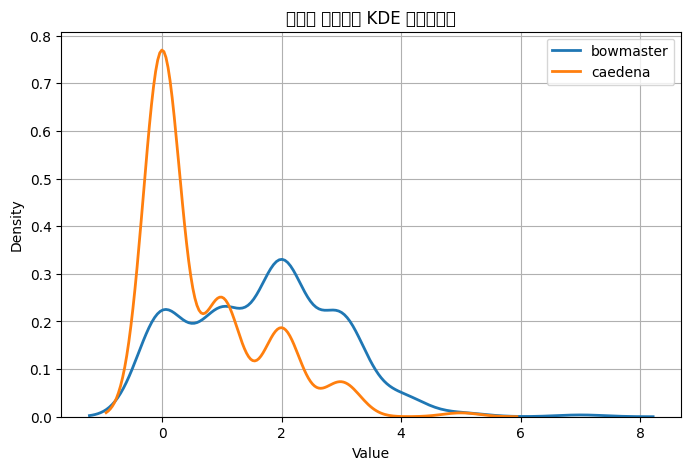

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(bow_df['growth'], label='bowmaster', linewidth=2)
sns.kdeplot(cadena_df['growth'], label='caedena', linewidth=2)
plt.title('KDE Line graph')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from scipy.stats import shapiro

stat1, p1 = shapiro(bow_df['growth'])
stat2, p2 = shapiro(cadena_df['growth'])

print(f'Group1 정규성 p-value: {p1:.12f}')
print(f'Group2 정규성 p-value: {p2}')

Group1 정규성 p-value: 0.000000000007
Group2 정규성 p-value: 5.077201240500524e-23


In [101]:
# 평균값 보기
print(bow_df['growth'].mean(), cadena_df['growth'].mean())

1.688212927756654 0.6823899371069182


In [18]:
from scipy.stats import ttest_ind

In [20]:
# 보우마스터 vs 카데나 성장량 비교
t_stat, p_value = ttest_ind(bow_df['growth'], cadena_df['growth'], equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 10.69371783239804
p-value: 3.639697806854939e-24


# 시각화

In [120]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # Windows면 보통 '맑은 고딕'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 부호 깨짐 방지

In [3]:
import matplotlib.pyplot as plt

# 박스플롯
plt.figure(figsize=(8,6))
plt.boxplot([bow_df['growth'], cadena_df['growth']], tick_labels=['보우마스터', '카데나'])
plt.title('성장량 비교 (보우마스터 vs 카데나)')
plt.ylabel('성장량 (레벨 증가)')
plt.grid(True)
plt.show()


NameError: name 'bow_df' is not defined

<Figure size 800x600 with 0 Axes>

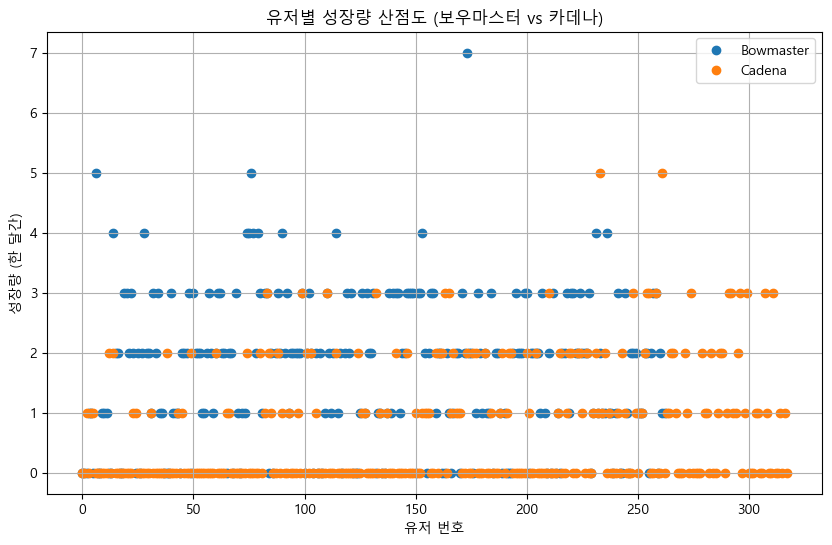

In [134]:
# 유저 인덱스 기반 산점도
plt.figure(figsize=(10,6))

plt.scatter(range(len(bow_df)), bow_df['growth'], label='Bowmaster')
plt.scatter(range(len(cadena_df)), cadena_df['growth'], label='Cadena')

plt.title('유저별 성장량 산점도 (보우마스터 vs 카데나)')
plt.xlabel('유저 번호')
plt.ylabel('성장량 (한 달간)')
plt.legend()
plt.grid(True)
plt.show()


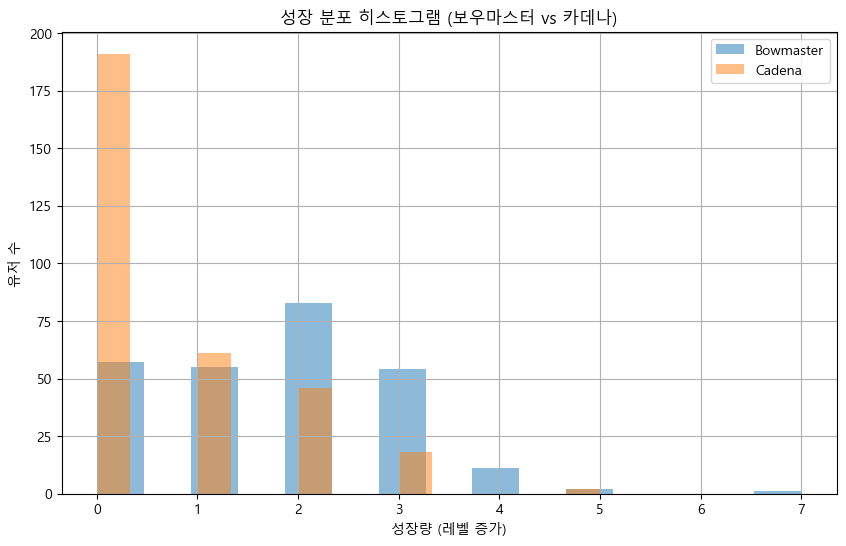

In [135]:
# 히스토그램 그리기
plt.figure(figsize=(10,6))

# 보우마스터 성장량 히스토그램
plt.hist(bow_df['growth'], bins=15, alpha=0.5, label='Bowmaster')

# 카데나 성장량 히스토그램
plt.hist(cadena_df['growth'], bins=15, alpha=0.5, label='Cadena')

plt.title('성장 분포 히스토그램 (보우마스터 vs 카데나)')
plt.xlabel('성장량 (레벨 증가)')
plt.ylabel('유저 수')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

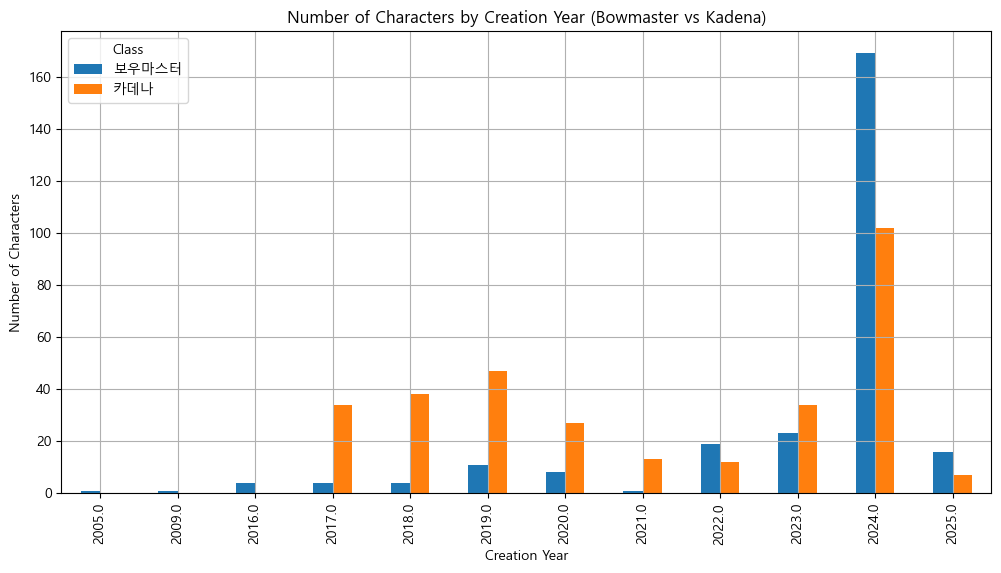

In [121]:
# # Warning 없이 create_year 컬럼 추가
# final_character_info_df.loc[:, 'create_year'] = final_character_info_df['character_date_create'].dt.year

# # 직업별로 그룹화
# grouped = final_character_info_df.groupby(['character_class', 'create_year']).size().unstack(fill_value=0)

# 그래프 그리기
plt.figure(figsize=(12,6))
grouped.T.plot(kind='bar', stacked=False, figsize=(12,6))  # .T로 전치(연도 기준 X축으로)
plt.title('Number of Characters by Creation Year (Bowmaster vs Kadena)')
plt.xlabel('Creation Year')
plt.ylabel('Number of Characters')
plt.legend(title='Class')
plt.grid(True)
plt.show()


In [119]:
final_character_info_df

,date,character_name,world_name,character_class,character_level,character_exp,character_exp_rate,character_date_create,past_level,growth,create_year
0,2025-04-27 00:00:00+09:00,낄룸,아케인,보우마스터,280.0,2.673179e+12,7.945,2016-05-13 00:00:00+09:00,280.0,0.0,2016.0
2,2025-04-27 00:00:00+09:00,팜화살,루나,보우마스터,280.0,2.664704e+12,7.919,2024-06-22 00:00:00+09:00,280.0,0.0,2024.0
3,2025-04-27 00:00:00+09:00,푸피쵸,오로라,보우마스터,280.0,2.639315e+12,7.844,2024-12-19 00:00:00+09:00,280.0,0.0,2024.0
4,2025-04-27 00:00:00+09:00,여름개같다,레드,보우마스터,280.0,2.636290e+12,7.835,2024-09-19 00:00:00+09:00,279.0,1.0,2024.0
5,2025-04-27 00:00:00+09:00,토야윤선,엘리시움,보우마스터,280.0,2.616816e+12,7.777,2024-06-20 00:00:00+09:00,279.0,1.0,2024.0
...,...,...,...,...,...,...,...,...,...,...,...
690,2025-04-27 00:00:00+09:00,깬슬,루나,카데나,280.0,1.084172e+11,0.322,2022-08-20 00:00:00+09:00,280.0,0.0,2022.0
691,2025-04-27 00:00:00+09:00,효묘,크로아,카데나,280.0,9.972696e+10,0.296,2020-12-17 00:00:00+09:00,279.0,1.0,2020.0
695,2025-04-27 00:00:00+09:00,평캔타슬,오로라,카데나,280.0,3.304400e+10,0.098,2023-07-08 00:00:00+09:00,280.0,0.0,2023.0
696,2025-04-27 00:00:00+09:00,최다찌님,엘리시움,카데나,280.0,1.899267e+10,0.056,2017-06-24 00:00:00+09:00,279.0,1.0,2017.0


<Figure size 1400x700 with 0 Axes>

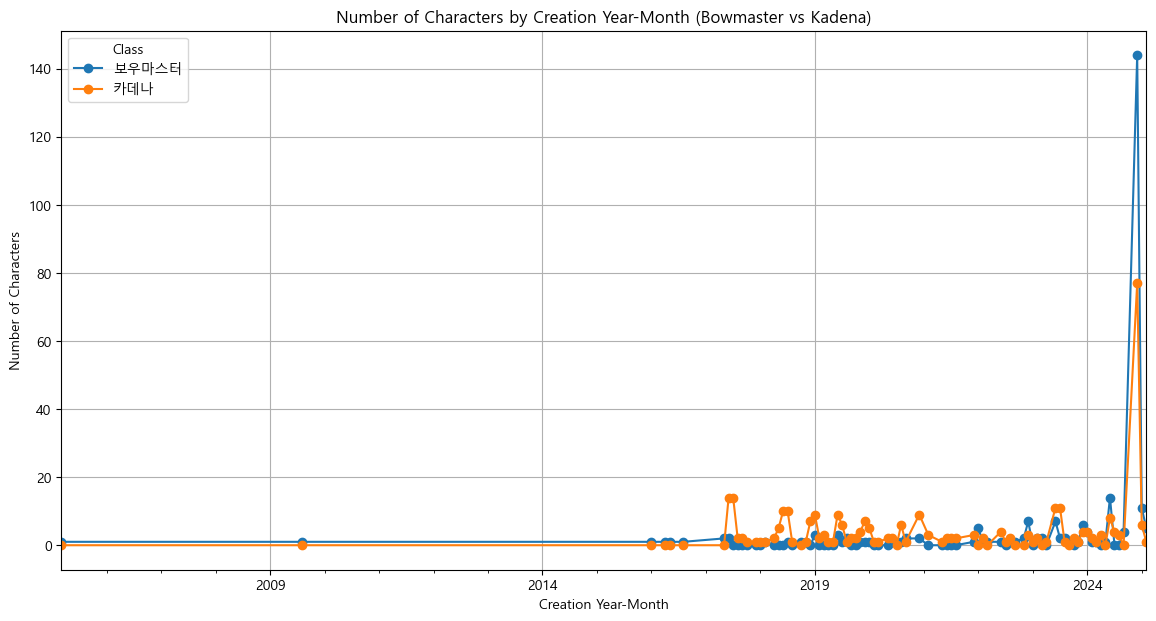

In [127]:
# # 연-월 단위로 변환
# final_character_info_df.loc[:, 'create_year_month'] = final_character_info_df['character_date_create'].dt.to_period('M')

# # 그룹화
# grouped_monthly = final_character_info_df.groupby(['character_class', 'create_year_month']).size().unstack(fill_value=0)

# 그래프 그리기
plt.figure(figsize=(14,7))
grouped_monthly.T.plot(kind='line', marker='o', stacked=False, figsize=(14,7))
plt.title('Number of Characters by Creation Year-Month (Bowmaster vs Kadena)')
plt.xlabel('Creation Year-Month')
plt.ylabel('Number of Characters')
plt.legend(title='Class')
plt.grid(True)
plt.show()


<Figure size 1400x700 with 0 Axes>

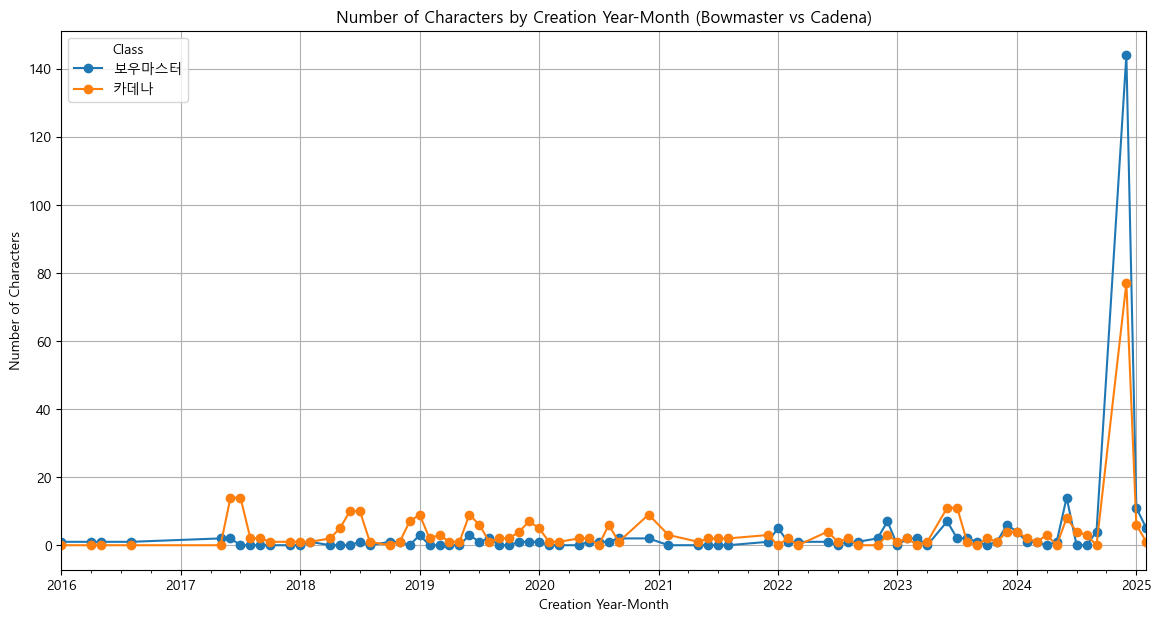

In [132]:
full_line_df = final_character_info_df[final_character_info_df['create_year_month'] >= '2016-01'].copy()

grouped_monthly = full_line_df.groupby(['character_class', 'create_year_month']).size().unstack(fill_value=0)

plt.figure(figsize=(14,7))
grouped_monthly.T.plot(kind='line', marker='o', stacked=False, figsize=(14,7))
plt.title('Number of Characters by Creation Year-Month (Bowmaster vs Cadena)')
plt.xlabel('Creation Year-Month')
plt.ylabel('Number of Characters')
plt.legend(title='Class')
plt.grid(True)
plt.show()

In [128]:
final_character_info_df

,date,character_name,world_name,character_class,character_level,character_exp,character_exp_rate,character_date_create,past_level,growth,create_year,create_year_month
0,2025-04-27 00:00:00+09:00,낄룸,아케인,보우마스터,280.0,2.673179e+12,7.945,2016-05-13 00:00:00+09:00,280.0,0.0,2016.0,2016-05
2,2025-04-27 00:00:00+09:00,팜화살,루나,보우마스터,280.0,2.664704e+12,7.919,2024-06-22 00:00:00+09:00,280.0,0.0,2024.0,2024-06
3,2025-04-27 00:00:00+09:00,푸피쵸,오로라,보우마스터,280.0,2.639315e+12,7.844,2024-12-19 00:00:00+09:00,280.0,0.0,2024.0,2024-12
4,2025-04-27 00:00:00+09:00,여름개같다,레드,보우마스터,280.0,2.636290e+12,7.835,2024-09-19 00:00:00+09:00,279.0,1.0,2024.0,2024-09
5,2025-04-27 00:00:00+09:00,토야윤선,엘리시움,보우마스터,280.0,2.616816e+12,7.777,2024-06-20 00:00:00+09:00,279.0,1.0,2024.0,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...
690,2025-04-27 00:00:00+09:00,깬슬,루나,카데나,280.0,1.084172e+11,0.322,2022-08-20 00:00:00+09:00,280.0,0.0,2022.0,2022-08
691,2025-04-27 00:00:00+09:00,효묘,크로아,카데나,280.0,9.972696e+10,0.296,2020-12-17 00:00:00+09:00,279.0,1.0,2020.0,2020-12
695,2025-04-27 00:00:00+09:00,평캔타슬,오로라,카데나,280.0,3.304400e+10,0.098,2023-07-08 00:00:00+09:00,280.0,0.0,2023.0,2023-07
696,2025-04-27 00:00:00+09:00,최다찌님,엘리시움,카데나,280.0,1.899267e+10,0.056,2017-06-24 00:00:00+09:00,279.0,1.0,2017.0,2017-06


In [129]:
final_character_info_df.to_csv('final_character_info.csv', index=False, encoding='utf-8-sig')